In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [4]:
data = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = data.copy()

In [6]:
df.shape

(891, 12)

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

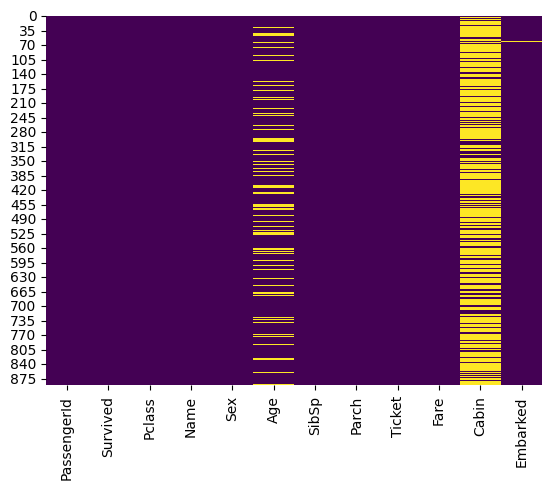

In [10]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked']. fillna(df['Embarked'].mode()[0])
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
df = df.drop(['Name', 'Cabin', 'Ticket','PassengerId'], axis =1)

In [14]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


<Axes: >

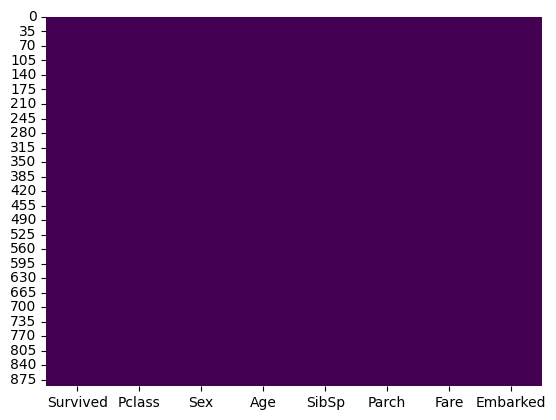

In [15]:
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = False)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [19]:
df_encoded = pd.get_dummies(df, columns = ['Sex', 'Embarked'], drop_first = True)

In [20]:
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,True,False,True
1,1,1,38.000000,1,0,71.2833,False,False,False
2,1,3,26.000000,0,0,7.9250,False,False,True
3,1,1,35.000000,1,0,53.1000,False,False,True
4,0,3,35.000000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True
887,1,1,19.000000,0,0,30.0000,False,False,True
888,0,3,29.699118,1,2,23.4500,False,False,True
889,1,1,26.000000,0,0,30.0000,True,False,False


In [26]:
df_encoded['Sex_male'] = df_encoded['Sex_male'].astype(int)
df_encoded['Embarked_Q'] = df_encoded['Embarked_Q'].astype(int)
df_encoded['Embarked_S'] = df_encoded['Embarked_S'].astype(int)

In [33]:
df_encoded = df_encoded.drop('Embarked_s', axis =1)

In [34]:
df_encoded.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,1
1,1,1,38.000000,1,0,71.2833,0,0,0
2,1,3,26.000000,0,0,7.9250,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,1
5,0,3,29.699118,0,0,8.4583,1,1,0
6,0,1,54.000000,0,0,51.8625,1,0,1
7,0,3,2.000000,3,1,21.0750,1,0,1
8,1,3,27.000000,0,2,11.1333,0,0,1
9,1,2,14.000000,1,0,30.0708,0,0,0


In [35]:
X = df_encoded.drop('Survived', axis =1)
y = df_encoded['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42)

# Logistic regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [121]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit (X_train, y_train)
y_pred = log_reg.predict(X_test)

In [122]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

confusion_matrix:
 [[90 15]
 [19 55]]
acccuracy_score:
 0.8100558659217877


# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [90]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [55]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

confusion_matrix:
 [[90 15]
 [20 54]]
acccuracy_score:
 0.8044692737430168


In [111]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

confusion_matrix:
 [[93 12]
 [24 50]]
acccuracy_score:
 0.7988826815642458


# XGBoost (Extreme Gradient Boosting)

In [69]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)


In [61]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

confusion_matrix:
 [[91 14]
 [19 55]]
acccuracy_score:
 0.8156424581005587


In [65]:
 from xgboost import plot_importance

<Figure size 1000x600 with 0 Axes>

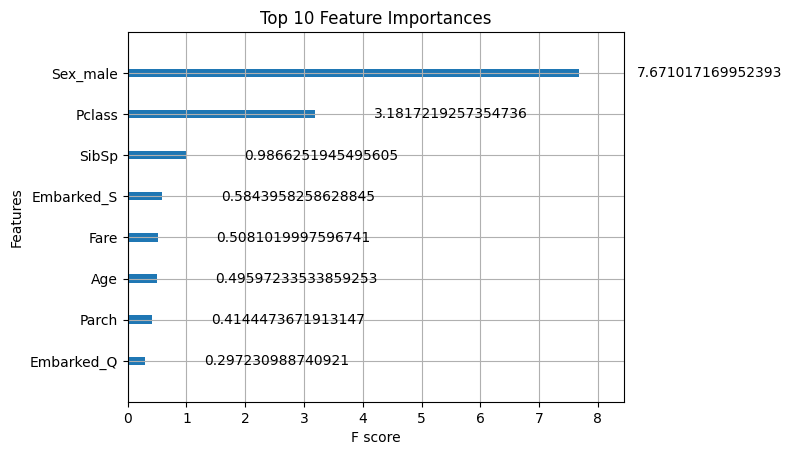

In [86]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='gain')  # Show top 10 features
plt.title('Top 10 Feature Importances')
plt.show()


# Support Vector Machines (SVM)

In [98]:
from sklearn.svm import SVC
svm = SVC(kernel ='rbf', random_state =42)
svm.fit (X_train, y_train)
y_pred = svm.predict(X_test)

In [99]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179

confusion_matrix:
 [[99  6]
 [55 19]]
acccuracy_score:
 0.659217877094972


# KNN Neighbors Classifier

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit (X_train,y_train)
y_pred = knn.predict(X_test)

In [103]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.76       105
           1       0.67      0.54      0.60        74

    accuracy                           0.70       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.69      0.70      0.69       179

confusion_matrix:
 [[85 20]
 [34 40]]
acccuracy_score:
 0.6983240223463687


# Voting Classifier

In [127]:
from sklearn.ensemble import VotingClassifier

models =  [('rf', rf), ('log_reg', log_reg), ('xgb', xgb), ('rf_grind', rf_grind)]

voting_model = VotingClassifier(
    estimators= models, 
    voting='hard'
)
voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

In [128]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       105
           1       0.86      0.73      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.84      0.84      0.84       179

confusion_matrix:
 [[96  9]
 [20 54]]
acccuracy_score:
 0.8379888268156425


# Hyper parameter tuning

In [117]:
from sklearn.model_selection import GridSearchCV

# Example: Random Forest hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose =1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print (grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
0.8230178272431793


In [125]:
from sklearn.ensemble import RandomForestClassifier
rf_grind = RandomForestClassifier(n_estimators = 100, random_state = 42,min_samples_leaf =2 , min_samples_split =2, max_depth = 10)
rf_grind.fit(X_train, y_train)
y_pred = rf_grind.predict(X_test)

In [126]:
print ('classification report:\n', classification_report(y_test, y_pred))
print ('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print ('acccuracy_score:\n', accuracy_score(y_test, y_pred))

classification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

confusion_matrix:
 [[95 10]
 [20 54]]
acccuracy_score:
 0.8324022346368715


# Feature Importance plots
Plots for logistic_regression, random_forest and XGBoost classifier

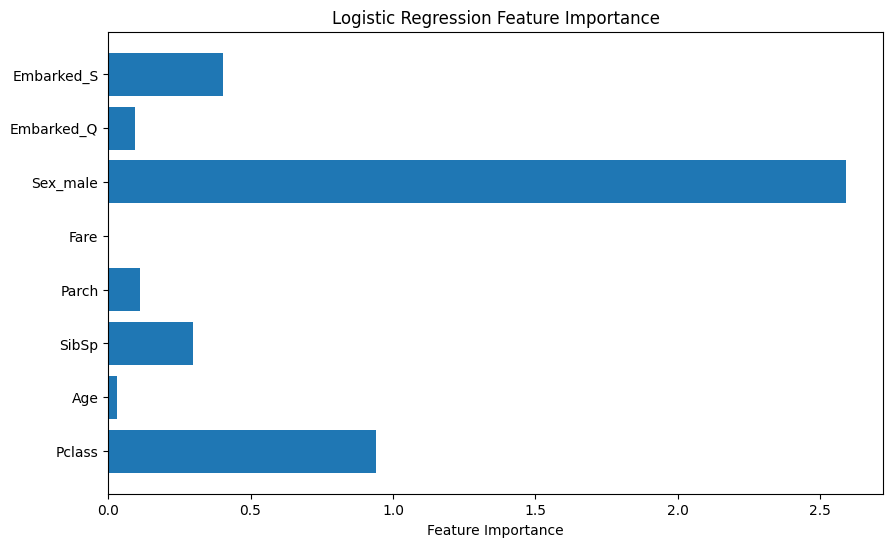

In [82]:
coefficients = np.abs(log_reg.coef_[0])
features = X_train.columns
plt.figure(figsize = (10,6))
plt.barh(features, coefficients)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression Feature Importance')
plt.show()

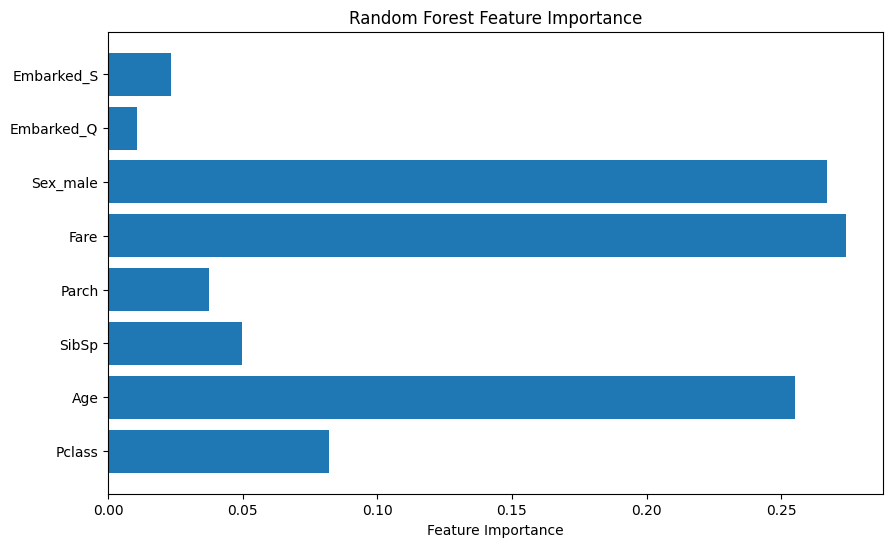

In [96]:
Importance = rf.feature_importances_
features = X_train.columns
plt.figure(figsize = (10,6))
plt.barh(features, Importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

<Figure size 1000x600 with 0 Axes>

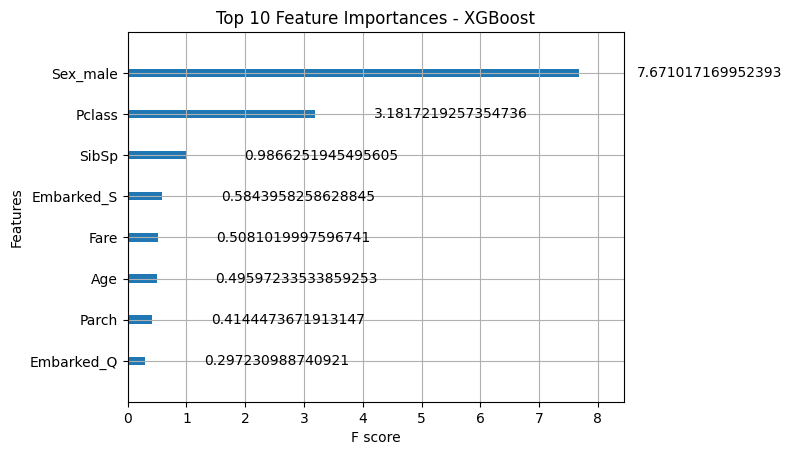

In [134]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plot_importance(xgb, importance_type='gain', max_num_features=10) 
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


# Summary
I have trained this dataset on logistic regression, random forest, XGBoost, SVM, KNeighbors, voting classifier, and hyperparameter tuning with random forest classifier.

Below are their accuracy scores:
1. Logistic regression ------------------------------------------81%
2. Random forest ------------------------------------------------80%
3. Extreme Gradient Boosting ------------------------------------82%
4. Support Vector Machines --------------------------------------66%
5. KNeighbors ---------------------------------------------------70%
6. Voting Classifier --------------------------------------------84%
7. hyperparameter tuning with random forest ---------------------83%

# Conclusion
A voting classifier comprising of random forest, logstic regression and xgboost had the highest accuracy score of 84%.

Random forest tuned with hyperparameters was second with 83%.

Extreme gradient boosting was 3rd with 82%.

Logistic regression was 4th with 81%.
